In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("D:\Elovvo\Task1_details\StudentPerformanceFactors.csv")

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Lion\AppData\Local\Temp\ipykernel_824\887829606.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\Elovvo\Task1_details\StudentPerformanceFactors.csv")


In [7]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


______________________________________________________________________________________________________________________
# Data Cleaning
_______________________________________________________________________________________________________________________

In [10]:
df = df.drop_duplicates()
df = df.dropna()

In [11]:
df = df[(df["Exam_Score"] >= 0) & (df["Exam_Score"] <= 100)]

In [12]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

______________________________________________________________________________________________________________________
# Columns in my Dataset
_______________________________________________________________________________________________________________________

In [13]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

-----------------------------------------------------------------------------------------------------------------------
# Scatter Plot of Actual Data (Hours Studied vs Exam Score)
-----------------------------------------------------------------------------------------------------------------------

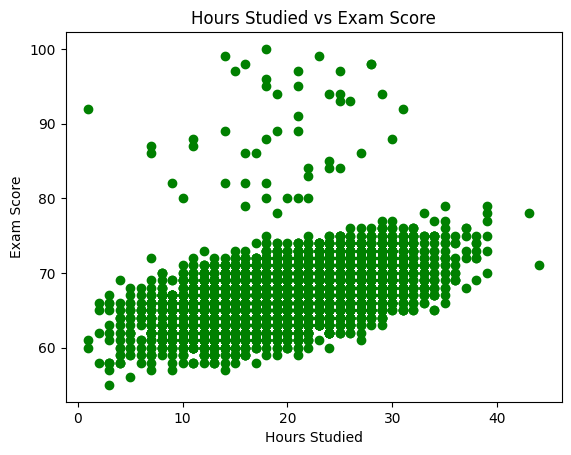

In [14]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"], color="green")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

-----------------------------------------------------------------------------------------------------------------------
# Starting to train Models (Linear Regression and Polynomial Regression)
-----------------------------------------------------------------------------------------------------------------------

In [15]:
#Linear Regression with only one feature
X = df[["Hours_Studied"]]
y = df["Exam_Score"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
yPred = model.predict(X_test)

In [16]:
yPred

array([66.67012938, 65.20048126, 66.67012938, ..., 67.25798862,
       70.19728485, 66.37619976], shape=(1276,))

In [17]:
score = model.score(X_test, Y_test)
print("Linear Regression Model R2 score: ", score)
comparison = pd.DataFrame({"Actual": Y_test, "Predicted": yPred})
comparison.head(10)


Linear Regression Model R2 score:  0.17436685279178743


,Actual,Predicted
2813,68,66.670129
4421,66,65.200481
3190,64,66.670129
1246,72,67.257989
4699,67,66.376200
235,69,68.433707
1680,71,67.845848
300,66,65.788341
5600,69,66.964059
6257,66,64.906552


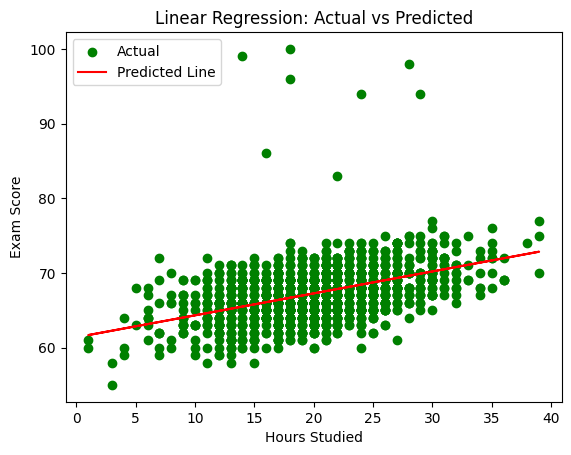

In [18]:
#Visualizing Linear Regression Prediction
plt.scatter(X_test, Y_test, color='green', label="Actual")
plt.plot(X_test, yPred, color="red", label="Predicted Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
#Polynomial Regression with only one feature
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
polyModel=LinearRegression()
polyModel.fit(X_train_poly,Y_train)
predPoly=polyModel.predict(X_test_poly)
polyScore=polyModel.score(X_test_poly,Y_test)
print(f"R2 Score of Polynomial Regression: {polyScore}")

R2 Score of Polynomial Regression: 0.17462968334956785


D:\Elovvo\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


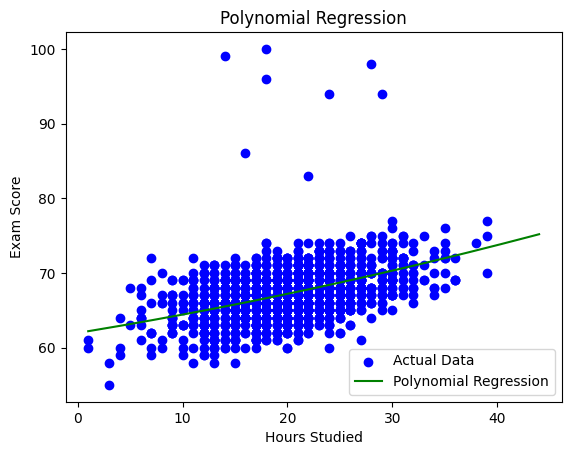

In [21]:
#Visualizing Polynomial Regression Prediction
X_curve=np.linspace(X.min(),X.max(),200).reshape(-1, 1)
X_curve_poly=poly.transform(X_curve)
y_curve=polyModel.predict(X_curve_poly)
plt.scatter(X_test, Y_test,color="blue",label="Actual Data")
plt.plot(X_curve, y_curve, color="green",label="Polynomial Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


-----------------------------------------------------------------------------------------------------------------------
# Values of Both (Linear and Polynomial Regression)
-----------------------------------------------------------------------------------------------------------------------

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_linear = model.predict(X_test)
y_pred_poly = polyModel.predict(poly.transform(X_test))

print("Linear R2:", r2_score(Y_test, y_pred_linear))
print("Polynomial R2:", r2_score(Y_test, y_pred_poly))
print("Linear MSE:", mean_squared_error(Y_test, y_pred_linear))
print("Polynomial MSE:", mean_squared_error(Y_test, y_pred_poly))



Linear R2: 0.17436685279178743
Polynomial R2: 0.17462968334956785
Linear MSE: 12.924133145881783
Polynomial MSE: 12.920018900789945


----------------------------------------------------------------------------------------------------------------------
# Conclusion
Linear Regression vs Polynomial Regression

Based on the evaluation results, both the Linear and Polynomial Regression models produced almost identical performance.

- Linear Regression Model:

Mean Squared Error: 12.924133145881783

R2 Score: 0.17436685279178743

- Polynomial Regression Model (Degree = 2):

Mean Squared Error: 12.920018900789945

R2 Score: 0.17462968334956785

-----------------------------------------------------------------------------------------------------------------------

______________________________________________________________________________________________________________________
# Now adding some more features to get more accurate values
_______________________________________________________________________________________________________________________

In [23]:
df.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [24]:
X = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Physical_Activity', 'Tutoring_Sessions']]
y = df['Exam_Score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)
#Training Linear Regression model
linear_model2 = LinearRegression()
linear_model2.fit(X_train, y_train)

Shape of X_train: (5101, 5)
Shape of X_test: (1276, 5)
Shape of Y_train: (5101,)
Shape of Y_test: (1276,)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
predictions2 = linear_model2.predict(X_test)
y_pred=linear_model2.predict(X_test)
mse2=mean_squared_error(y_test,    y_pred)
print("Newly trained Linear Regression Model's results:")
print(f"Root Mean Squared Error: {mse2}")
r_squared = linear_model2.score(X_test, y_test)
print(f"R2 Score of Linear Regression Model: {r_squared}")


Newly trained Linear Regression Model's results:
Root Mean Squared Error: 6.794852159561367
R2 Score of Linear Regression Model: 0.565924065468113


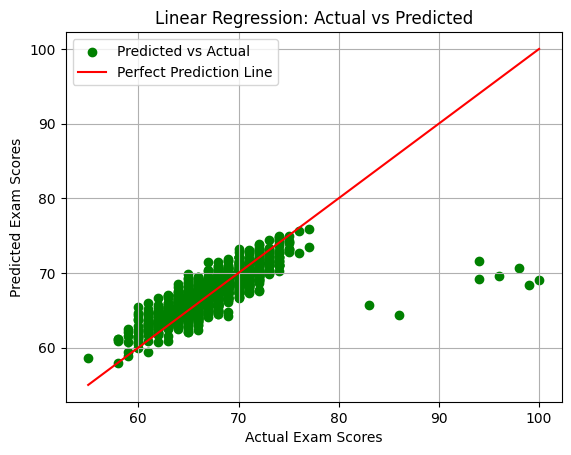

In [28]:
#Visualizing Prediction of Linear Regression Model with 5 features
plt.scatter(y_test, y_pred, color="green", label="Predicted vs Actual")
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

In [29]:
#Polynomial Regression
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly,Y_train)
p_predictions2 = poly_model2.predict(X_test_poly)
p_mse2 = mean_squared_error(Y_test, p_predictions2)
p_r_square2 = poly_model2.score(X_test_poly,Y_test)
print("Newly trained Polynomial Regression Model's results:")
print(f"Mean Squared Error:{p_mse2}")
print(f"R2 Score of Polynomial Regression Model: {p_r_square2}")

Newly trained Polynomial Regression Model's results:
Mean Squared Error:12.920018900789945
R2 Score of Polynomial Regression Model: 0.17462968334956785


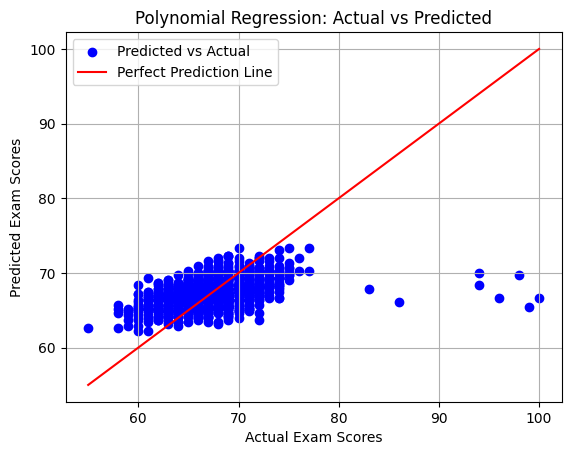

In [30]:
#Visualizing Prediction of Polynomial Regression Model with 5 features
plt.scatter(Y_test, p_predictions2, color="blue", label="Predicted vs Actual")
line = np.linspace(min(Y_test), max(Y_test), 100)
plt.plot(line, line, color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

----------------------------------------------------------------------------------------------------------------------
# Conclusion
Linear Regression vs Polynomial Regression (with 5 additional input features)

Based on the evaluation results, the Linear Regression model performed significantly better than the Polynomial Regression model.


- Linear Regression Model:

    Mean Squared Error: 6.794852159561367

    R² Score: 0.565924065468113


- Polynomial Regression Model:

    Mean Squared Error : 12.920018900789945

    R² Score: 0.17462968334956785

Final Statement:
Adding 5 extra features improved Linear Regression substantially, while Polynomial Regression still failed to generalize well. Therefore, Linear Regression is the preferred model.

-----------------------------------------------------------------------------------------------------------------------

______________________________________________________________________________________________________________________
# Now adding categorical columns also
_______________________________________________________________________________________________________________________

In [31]:
#Converting categorical columns to numeric
cat_cols = df.select_dtypes(include="object").columns.tolist()
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [32]:
df_encoded.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')

In [33]:
features = [
    "Hours_Studied",
    "Attendance",
    "Sleep_Hours",
    "Previous_Scores",
    "Tutoring_Sessions",
    "Parental_Involvement_Medium",
    "Access_to_Resources_Medium",
    "Internet_Access_Yes",
    "Teacher_Quality_Medium",
    "School_Type_Public"
]

X = df_encoded[features]
y = df_encoded["Exam_Score"]


In [34]:
y = df_encoded["Exam_Score"]
X = df_encoded[features]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
#Training Linear Regression Model
linreg3= LinearRegression()
linreg3.fit(X_train, y_train)
y_pred = linreg3.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression R2 Score: 0.6140220490255885
Linear Regression MSE: 6.0419454410663525


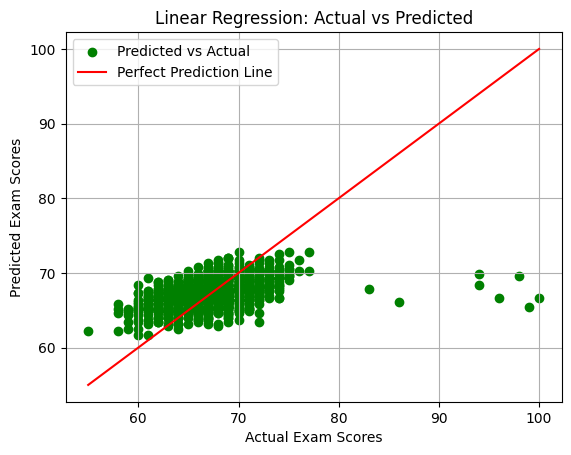

In [36]:
# Visualizing Prediction of Linear Regression Model
plt.scatter(y_test, y_pred_linear, color="green", label="Predicted vs Actual")
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


In [37]:
#Training Polynomial Regression Model
poly3 = PolynomialFeatures(degree=2)
X_train_poly = poly3.fit_transform(X_train)
X_test_poly = poly3.transform(X_test)

polyreg3 = LinearRegression()
polyreg3.fit(X_train_poly, y_train)
y_pred_poly = polyreg3.predict(X_test_poly)

print("Polynomial Regression R2 Score:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_pred_poly))

Polynomial Regression R2 Score: 0.6092560841329253
Polynomial Regression MSE: 6.11654996130595


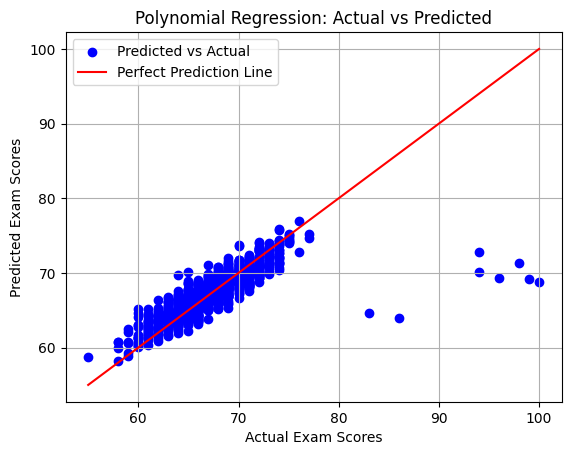

In [38]:
# Visualizing Prediction of Polynomial Regression Model
plt.scatter(y_test, y_pred_poly, color="blue", label="Predicted vs Actual")
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color="red", label="Perfect Prediction Line")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


----------------------------------------------------------------------------------------------------------------------
# Conclusion

Linear Regression vs Polynomial Regression with 10 features as input

Based on the evaluation results, the Linear Regression model performed slightly better than the Polynomial Regression model.

- Linear Regression Model:

Mean Squared Error (MSE): 6.0419454410663525

R² Score: 0.6140220490255885

- Polynomial Regression Model:

Mean Squared Error (MSE): 6.11654996130595

R² Score: 0.6092560841329253

Final Statement:
Both models performed similarly, but Linear Regression achieved a slightly lower error and higher R² score compared to Polynomial Regression. This indicates that a simple Linear Regression model is sufficient for this dataset, and adding polynomial complexity does not bring meaningful improvement.

-----------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------
# Predicting Exam Score for New Data using Linear Regression
-----------------------------------------------------------------------------------------------------------------------

In [39]:
# Random new student data
newData={
    "Hours_Studied": [5],
    "Attendance": [80],
    "Sleep_Hours": [7],
    "Previous_Scores": [70],
    "Tutoring_Sessions": [2],
    "Parental_Involvement_Medium": [1],
    "Access_to_Resources_Medium": [0],
    "Internet_Access_Yes": [1],
    "Teacher_Quality_Medium": [1],
    "School_Type_Public": [0]
}
df1 = pd.DataFrame(newData)
predicted_score = linreg3.predict(df1)
print("Predicted Exam Score:", predicted_score[0])


Predicted Exam Score: 62.85455798800392


----------------------------------------------------------------------------------------------------------------------
# Another Prediction
-----------------------------------------------------------------------------------------------------------------------

In [40]:
newData2={
    "Hours_Studied": [2],
    "Attendance": [98],
    "Sleep_Hours": [5],
    "Previous_Scores": [68],
    "Tutoring_Sessions": [1],
    "Parental_Involvement_Medium": [0],
    "Access_to_Resources_Medium": [1],
    "Internet_Access_Yes": [0],
    "Teacher_Quality_Medium": [1],
    "School_Type_Public": [1]
}
df2=pd.DataFrame(newData2)
predicted_score2 = linreg3.predict(df2)
print("Predicted Exam Score:", predicted_score2[0])

Predicted Exam Score: 64.10931978178462


----------------------------------------------------------------------------------------------------------------------
#  Final Conclusion

Through three experimental setups, it was observed that Polynomial Regression consistently failed to improve performance, while Linear Regression improved significantly as more relevant features were added.

- With baseline features, both models performed poorly.

- With 5 additional features, Linear Regression improved substantially, while Polynomial Regression remained weak.

- With 10 features, Linear Regression achieved the best performance with an R² score of 0.614 and the lowest error, slightly outperforming Polynomial Regression.

Therefore, the Linear Regression model with 10 input features is the most reliable and effective model for this dataset. It was also chosen for predictions due to its higher accuracy and better generalization ability.

-----------------------------------------------------------------------------------------------------------------------

In [41]:
import joblib
joblib.dump(linreg3,"LinearRegression_Model(ExamScorePredictor).joblib")

PermissionError: [Errno 13] Permission denied: 'LinearRegression_Model(ExamScorePredictor).joblib'